In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
alpha = 2.5         # sensitivity factor to occupancy (tune as needed)
base_price = 10.0

In [5]:
from google.colab import files
uploaded = files.upload()

df = pd.read_csv("dataset.csv")

Saving dataset.csv to dataset.csv


In [6]:
df['price'] = base_price

In [10]:
new_prices = []

In [11]:
for lot_id, group in df.groupby('ID'):
    price = base_price
    prices = []
    for _, row in group.iterrows():
        occ = row['Occupancy']
        cap = row['Capacity']
        utilization = occ / cap if cap > 0 else 0
        price = price + alpha * utilization
        price = max(5, min(30, price))  # bound the price between $5 and $30
        prices.append(price)
    new_prices.extend(prices)


In [12]:
df['Model1_Price'] = new_prices

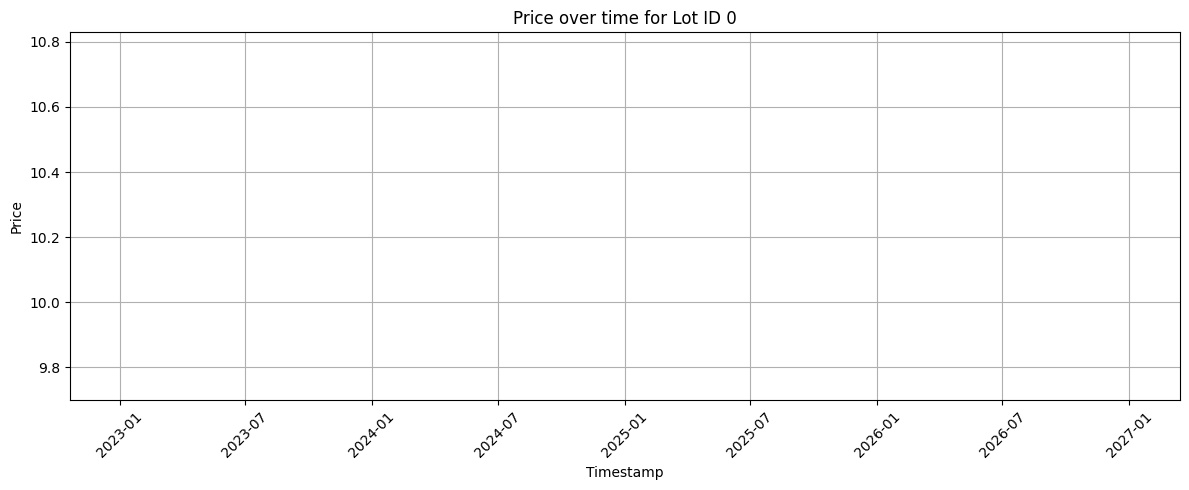

In [13]:
import seaborn as sns
plt.figure(figsize=(12, 5))
sample_lot = df[df['ID'] == df['ID'].unique()[0]]
sns.lineplot(x=sample_lot['timestamp'], y=sample_lot['Model1_Price'])
plt.title(f"Price over time for Lot ID {sample_lot['ID'].iloc[0]}")
plt.xlabel("Timestamp")
plt.ylabel("Price")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()